In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'heart.csv')

In [46]:
df.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
73,59,1,0,140,177,0,1,162,1,0.0,2,1,3,0
54,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
196,58,1,0,100,234,0,1,156,0,0.1,2,1,3,0
421,42,0,0,102,265,0,0,122,0,0.6,1,0,2,1
41,54,1,2,120,258,0,0,147,0,0.4,1,0,3,1
380,58,1,0,146,218,0,1,105,0,2.0,1,1,3,0
304,52,0,2,136,196,0,0,169,0,0.1,1,0,2,1
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
279,41,0,1,105,198,0,1,168,0,0.0,2,1,2,1
119,42,1,1,120,295,0,1,162,0,0.0,2,0,2,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [11]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
#duplicate data check and drop
df.duplicated().any()


True

In [13]:
#drop the duplicate data
df = df.drop_duplicates()

In [14]:
df.shape

(302, 14)

In [15]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: >

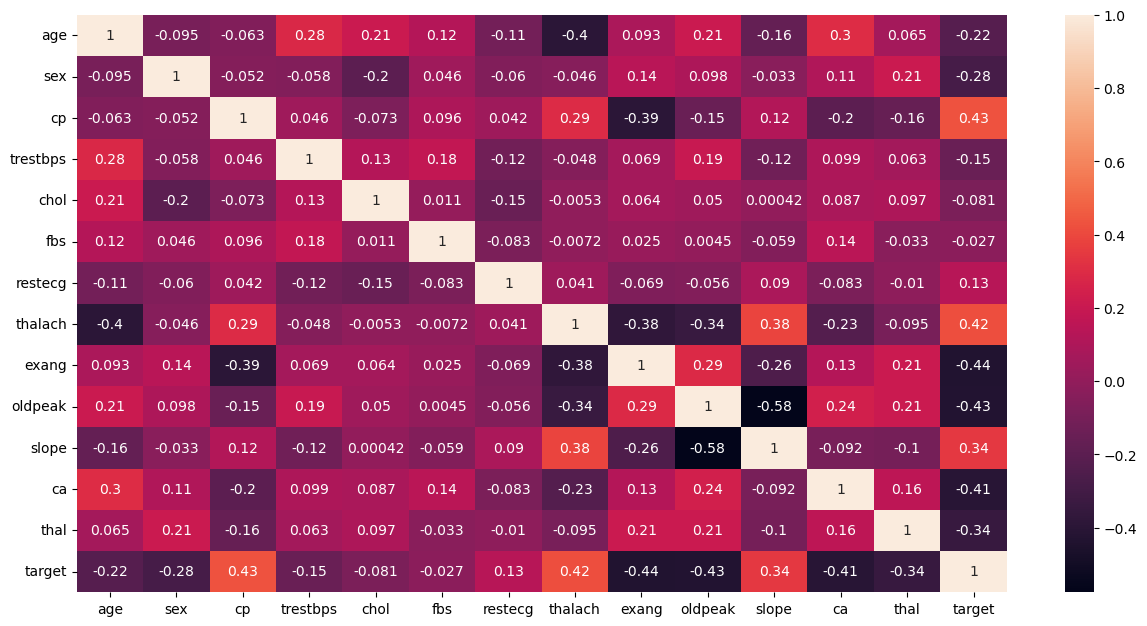

In [19]:
#draw corection matrix
plt.figure(figsize=(15,7.5))
sns.heatmap(df.corr(), annot=True)

[Text(0, 0, '138'), Text(0, 0, '164')]

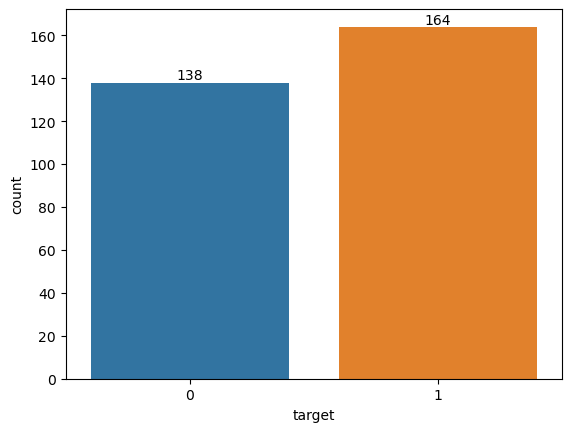

In [27]:
#How Many People Have Heart Disease, And How Many Don't Have Heart Disease In This Dataset?
df['target'].value_counts()
ax = sns.countplot(x='target', data = df)
ax.bar_label(ax.containers[0])

[Text(0, 0, '96'), Text(0, 0, '206')]

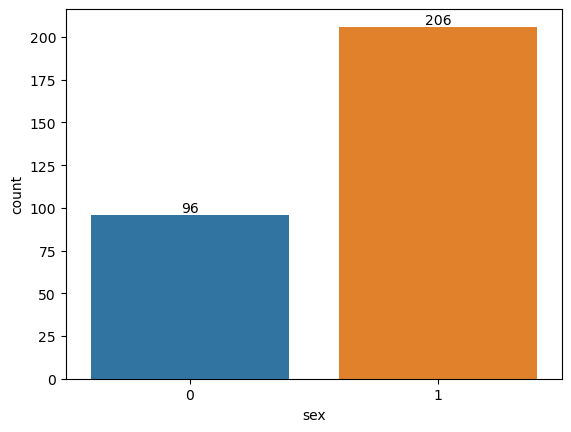

In [33]:
#Find Count of  Male & Female in this Dataset
df['sex'].value_counts()
ax1 = sns.countplot(x ='sex', data = df)
ax1.bar_label(ax1.containers[0])

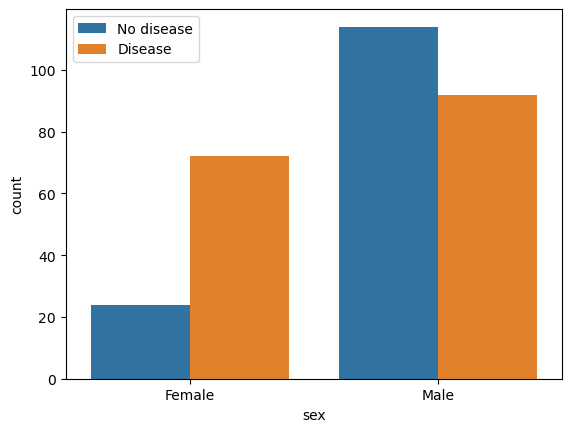

In [39]:
#Find Gender Distribution According to The Target Variable
sns.countplot(x = 'sex', hue='target', data = df)
plt.xticks([1,0],['Male', 'Female'])
plt.legend(labels = ['No disease', 'Disease'])
plt.show()

/var/folders/9w/xlpk4fg904g45ysmd0d8d2x40000gn/T/ipykernel_40297/1776349710.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


<Axes: xlabel='age', ylabel='Density'>

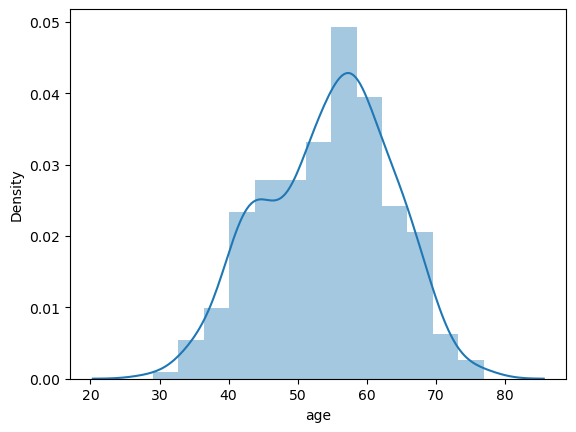

In [43]:
#check Age Distribution In The Dataset
sns.distplot(df['age'])

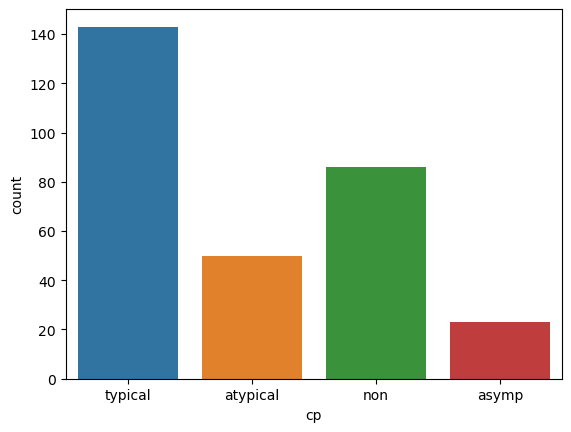

In [51]:
#Check Chest Pain Type
df.value_counts(['cp'])
sns.countplot(x = 'cp', data = df)
plt.xticks([0, 1, 2, 3], ['typical', 'atypical', 'non', 'asymp'])
plt.show()

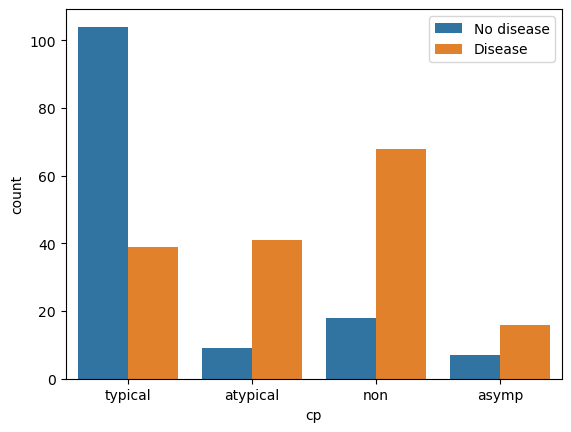

In [55]:
#Show The Chest Pain Distribution As Per Target Variable
sns.countplot(x = 'cp', hue='target', data = df)
plt.xticks([0, 1, 2, 3], ['typical', 'atypical', 'non', 'asymp'])
plt.legend(labels = ['No disease', 'Disease'])


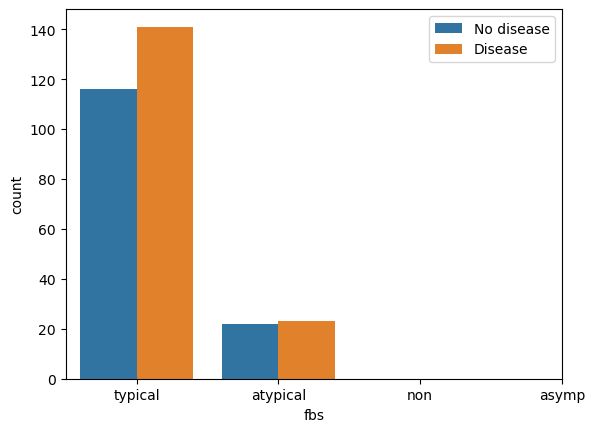

In [59]:
#Show Fasting Blood Sugar Distribution According To Target Variable
sns.countplot(x = 'fbs', hue='target', data = df)
plt.xticks([0, 1, 2, 3], ['typical', 'atypical', 'non', 'asymp'])
plt.legend(labels = ['No disease', 'Disease'])


<Axes: >

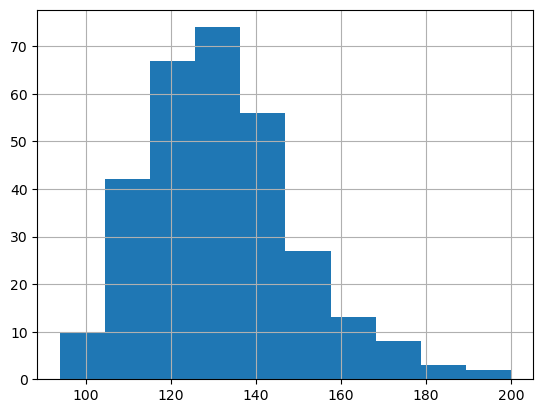

In [67]:
#Check Resting Blood Pressure Distribution
# sns.countplot(x = 'trestbps', data = df)
# plt.figure(figsize=(40,5))
df['trestbps'].hist()

/Users/abrarhasnat/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/Users/abrarhasnat/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/Users/abrarhasnat/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


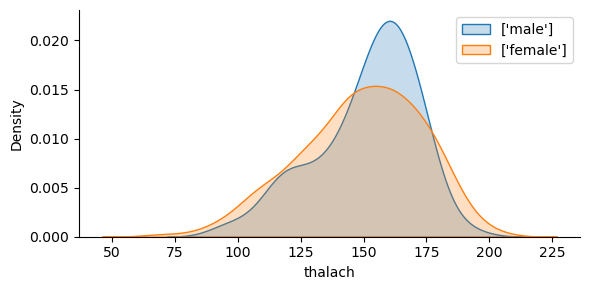

In [73]:
#Compare Resting Blood Pressure As Per Sex Column
g = sns.FacetGrid(df, hue='sex', aspect=2)
g.map(sns.kdeplot, 'thalach', shade = True)
plt.legend([['male'], ['female']])

<Axes: >

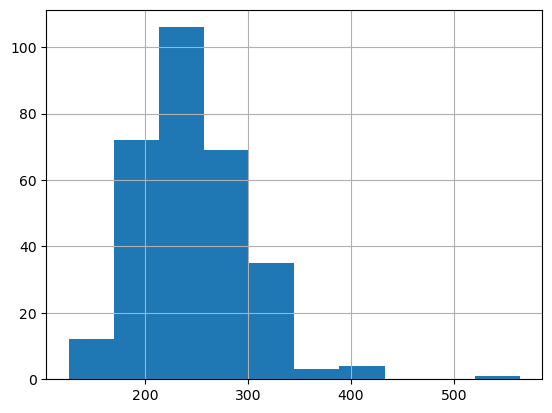

In [74]:
#Show Distribution of Serum cholesterol
df['chol'].hist()

In [77]:
#Plot Continuous Variables
cate_val = []
cont_val = []

for column in df.columns:
    if df[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)
    

In [78]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [79]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

<Figure size 2000x2000 with 0 Axes>

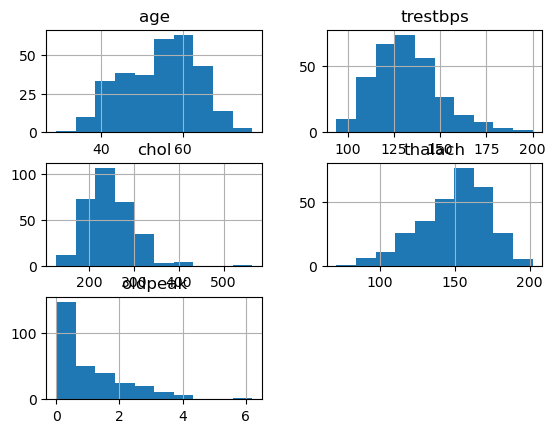

<Figure size 2000x2000 with 0 Axes>

In [84]:
df.hist(cont_val)
plt.figure(figsize=(20,20))


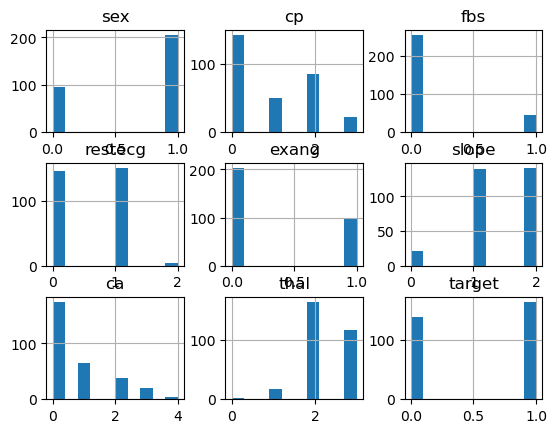

In [86]:
df.hist(cate_val)
plt.show()